C:\Users\santi\AppData\Local\Temp\ipykernel_12932\3651196926.py:19: DeprecationWarning: Call to deprecated method getCaseNumber. (use method which follows pep8) -- Deprecated since version 1.0.0.
  for i in range(0, data.getCaseNumber() - 1):


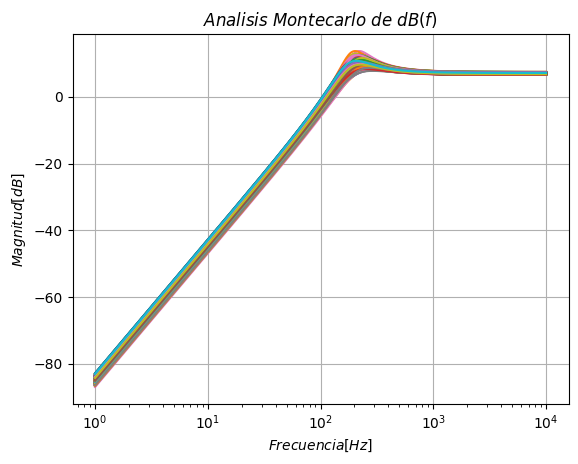

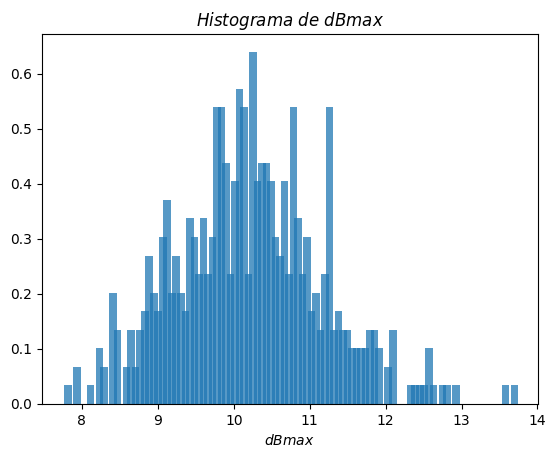

C:\Users\santi\AppData\Local\Temp\ipykernel_12932\3651196926.py:47: DeprecationWarning: Call to deprecated method getCaseNumber. (use method which follows pep8) -- Deprecated since version 1.0.0.
  for i in range(0, data.getCaseNumber() - 1):


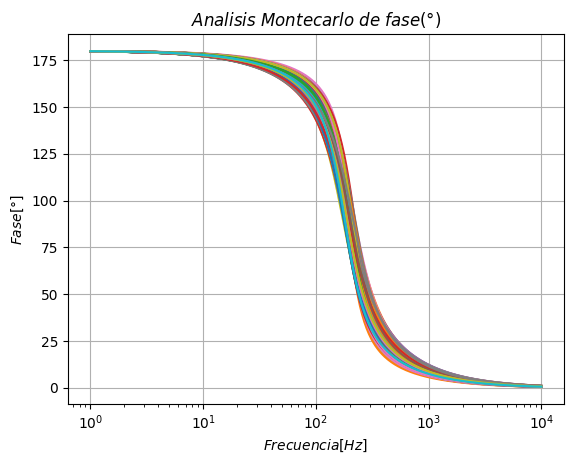

In [5]:
import ltspice
import numpy as np
import matplotlib.pyplot as plt

#Arreglo para histograma
dBmax = []
min_diff = []
#Nombre del archivo .raw
raw_file = "test.raw"

data = ltspice.Ltspice(raw_file)
data.parse()

#Obtengo los datos de frecuencia
frec = data.get_frequency()
#print('La cantidad de graficos es: %d' %data.getCaseNumber()) #Numero de casos a analizar por el montecarlo


for i in range(0, data.getCaseNumber() - 1):
    nodesVout = data.get_data ('V(n002)', i)
    nodesVin = data.get_data ('V(n003)', i)
    db = np.array(nodesVout) / np.array(nodesVin)
    
    dBmax.append(max(20*np.log10(db)))

    plt.semilogx(frec, 20*np.log10(db), label='Vout/Vin')

#Grafico de dB(f)
plt.xlabel('$Frecuencia [Hz]$')
plt.ylabel('$Magnitud [dB]$')
plt.title('$Analisis$ $Montecarlo$ $de$ $dB(f)$')
plt.grid(True)

plt.show()

#Grafico de histograma
plt.title('$Histograma$ $de$ $dBmax$')#Titulo
plt.xlabel('$dBmax$')#Etiqueta eje x

#Ancho de las barras
bin_width = 0.1

plt.hist(dBmax, width = bin_width , density= True ,bins=100, alpha=0.75)

plt.show()

for i in range(0, data.getCaseNumber() - 1):
    nodesVout = data.get_data ('V(n002)', i)
    nodesVin = data.get_data ('V(n003)', i)

    angle = np.angle(nodesVout/nodesVin , deg = True)
    
    #Lo que sigue es para tratar de encontrar la frecuencia donde el angulo es 90°

    # Encontrar el índice del valor más cercano
    #indice_mas_cercano = np.argmin(np.abs(angle - 90))

    # Obtener el valor más cercano
    #min_diff.append(angle[indice_mas_cercano])
    
    
    plt.semilogx(frec, (angle), label='Angulo')

#Grafico de angulo(°)
plt.xlabel('$Frecuencia [Hz]$')
plt.ylabel('$Fase [°]$')
plt.title('$Analisis$ $Montecarlo$ $de$ $fase(°)$')
plt.grid(True)

plt.show()

#Grafico de histograma de frecuencia a 90°
#plt.title('$Histograma$ $de$ $f(90°)$')#Titulo
#plt.xlabel('$f(90°)$')#Etiqueta eje x

#Ancho de las barras
#bin_width = 0.1

#plt.hist(min_diff, width = bin_width , density= True ,bins=100, alpha=0.75)

#plt.show()
